In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import statsmodels.stats.weightstats as stw
import statsmodels.stats.proportion as stp
import math
import warnings
warnings.filterwarnings("ignore")

**Descriptive Data Analysis**

In [2]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [3]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


**habbit showing null values**

In [5]:
df1.dropna(subset=['habit'], inplace=True)

**Habit column showing some Garbage Value**

In [6]:
df1.describe()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,11.860369,279.555427,0.518476,0.558891,3.810624,5.544141,0.838337
std,27.774913,237.088266,0.499947,0.496807,1.182210,2.383457,0.368354
min,0.010238,0.000000,0.000000,0.000000,0.000000,-0.198611,0.000000
25%,1.000000,89.000000,0.000000,0.000000,4.000000,3.805278,1.000000
50%,4.000000,206.000000,1.000000,1.000000,4.000000,5.627083,1.000000
75%,12.000000,436.000000,1.000000,1.000000,5.000000,7.395764,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


**bat_landing_to_food showing extream decimal values in zero**

In [7]:
df1["hours_after_sunset"] = df1['hours_after_sunset'].apply(lambda x: x if x>0 else (-1*x))

In [8]:
df1['bat_landing_to_food'].value_counts()

bat_landing_to_food
1.000000      127
2.000000      104
3.000000       64
4.000000       61
5.000000       44
             ... 
0.018396        1
76.000000       1
45.000000       1
0.062233        1
120.000000      1
Name: count, Length: 191, dtype: int64

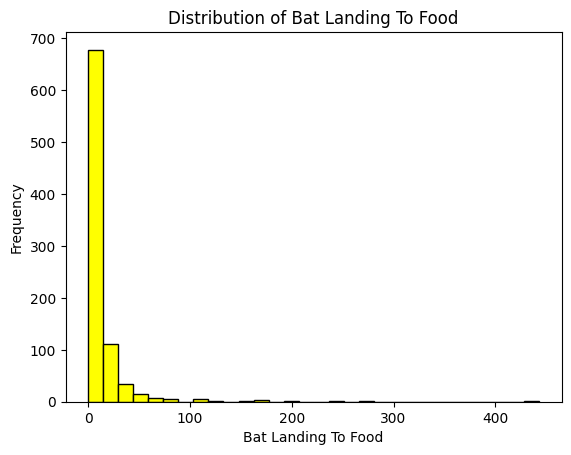

In [9]:
plt.hist(df1["bat_landing_to_food"], bins=30, color='yellow', edgecolor='black')
plt.xlabel("Bat Landing To Food")
plt.ylabel("Frequency")
plt.title("Distribution of Bat Landing To Food")
plt.show()

In [10]:
sample = df1['bat_landing_to_food'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %.2f" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %.2f" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 11.860369096964202
Median: 4.00
Mode value: 1.00
Range: 442.99
Sample variance: 771.45. Population variance: 770.55.
Sample std. dev.: 27.77. Population std. dev.: 27.76.
IQR: 11.00. 25th percentile: 1.00. 75th percentile: 12.00


In [11]:
df1['seconds_after_rat_arrival'].value_counts()

seconds_after_rat_arrival
22     7
105    7
0      6
187    6
9      5
      ..
293    1
790    1
117    1
237    1
233    1
Name: count, Length: 486, dtype: int64

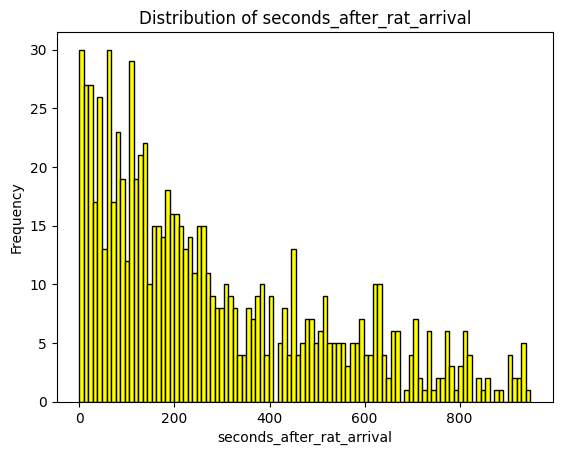

In [12]:
plt.hist(df1["seconds_after_rat_arrival"], bins=100, color='yellow', edgecolor='black')
plt.xlabel("seconds_after_rat_arrival")
plt.ylabel("Frequency")
plt.title("Distribution of seconds_after_rat_arrival")
plt.show()


In [13]:
sample = df1['seconds_after_rat_arrival'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %d" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %d" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 279
Median: 206.00
Mode value: 22
Range: 949
Sample variance: 56210.85. Population variance: 56145.94.
Sample std. dev.: 237.09. Population std. dev.: 236.95.
IQR: 347.00. 25th percentile: 89.00. 75th percentile: 436.00


In [14]:
bins = [0, 200, 400, df1['seconds_after_rat_arrival'].max()]
labels = ["immediate", "short_delay", "long_delay"]
df1["bat_rat_after_rat_arrive_bin"] = pd.cut(df1["seconds_after_rat_arrival"], bins=bins, labels=labels)


In [15]:
df1['bat_rat_after_rat_arrive_bin'].value_counts()

bat_rat_after_rat_arrive_bin
immediate      417
long_delay     238
short_delay    205
Name: count, dtype: int64

In [16]:
risk_taking_times = df1[df1['risk'] == 1]['bat_landing_to_food']
risk_avoidance_times = df1[df1['risk'] == 0]['bat_landing_to_food']


print(f"Risk-taking approach times:")
print(f"  Count: {len(risk_taking_times)}")
print(f"  Mean: {stats.mean(risk_avoidance_times):.2f} seconds")
print(f"  Median: {np.median(risk_avoidance_times):.2f} seconds")
print(f"  Std Dev: {np.std(risk_avoidance_times, ddof=1):.2f} seconds")

print(f"\nRisk-avoidance approach times:")
print(f"  Count: {len(risk_avoidance_times)}")
print(f"  Mean: {stats.mean(risk_avoidance_times):.2f} seconds")
print(f"  Median: {np.median(risk_avoidance_times):.2f} seconds")
print(f"  Std Dev: {np.std(risk_avoidance_times, ddof=1):.2f} seconds")

Risk-taking approach times:
  Count: 449
  Mean: 6.98 seconds
  Median: 2.00 seconds
  Std Dev: 20.08 seconds

Risk-avoidance approach times:
  Count: 417
  Mean: 6.98 seconds
  Median: 2.00 seconds
  Std Dev: 20.08 seconds


In [17]:
total_attempts = len(df1)
successful_attempts = len(df1[df1['reward'] == 1])
overall_success_rate = successful_attempts / total_attempts

print(f"Overall foraging attempts: {total_attempts}")
print(f"Successful attempts: {successful_attempts}")
print(f"Overall success rate: {overall_success_rate:.3f} ({overall_success_rate*100:.1f}%)")

# Success rates by risk behavior
risk_taking_success = df1[df1['risk'] == 1]['reward'].mean()
risk_avoidance_success = df1[df1['risk'] == 0]['reward'].mean()

print(f"\nSuccess rates by risk behavior:")
print(f"Risk-taking success rate: {risk_taking_success:.3f} ({risk_taking_success*100:.1f}%)")
print(f"Risk-avoidance success rate: {risk_avoidance_success:.3f} ({risk_avoidance_success*100:.1f}%)")


Overall foraging attempts: 866
Successful attempts: 484
Overall success rate: 0.559 (55.9%)

Success rates by risk behavior:
Risk-taking success rate: 0.218 (21.8%)
Risk-avoidance success rate: 0.926 (92.6%)


##  Key columns in dataset1

For investigating whether bats perceive rats as predators, we focus on:
- **Risk Column**: 
- **bat_landing_to_food**: 
- **Rewards**: 
- **Habit**:

In [18]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


In [20]:
df2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


**hours_after_sunset showing negetive values**

In [21]:
df2["hours_after_sunset"] = df2['hours_after_sunset'].apply(lambda x: x if x>=0 else (-1*x))

In [22]:
df2['bat_landing_number'].value_counts()

bat_landing_number
2      73
1      72
3      68
5      46
14     45
       ..
116     1
151     1
158     1
110     1
97      1
Name: count, Length: 119, dtype: int64

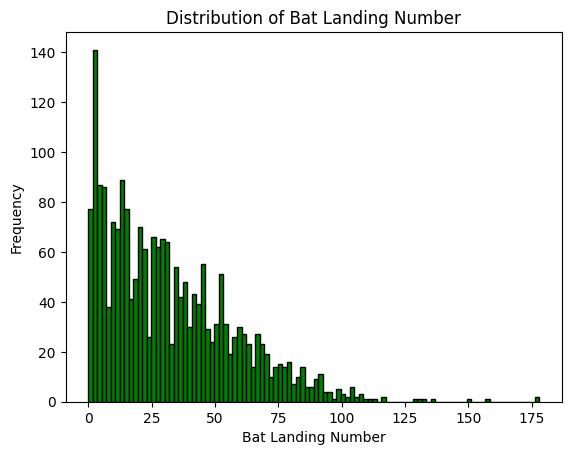

In [23]:
plt.hist(df2["bat_landing_number"], bins=100, color='green', edgecolor='black')
plt.xlabel("Bat Landing Number")
plt.ylabel("Frequency")
plt.title("Distribution of Bat Landing Number")
plt.show()

In [24]:
sample = df2['bat_landing_number'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %d" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %d" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 32
Median: 27.00
Mode value: 2
Range: 178
Sample variance: 656.10. Population variance: 655.79.
Sample std. dev.: 25.61. Population std. dev.: 25.61.
IQR: 37.00. 25th percentile: 11.00. 75th percentile: 48.00


In [25]:
df2['food_availability'].value_counts()

food_availability
3.000000    453
4.000000    353
2.000000    312
0.000000    185
1.000000    143
           ... 
1.888948      1
1.426230      1
1.034902      1
3.989705      1
3.438596      1
Name: count, Length: 600, dtype: int64

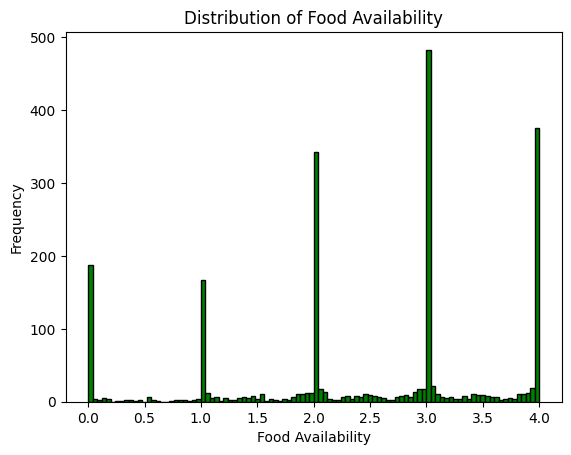

In [26]:
plt.hist(df2["food_availability"], bins=100, color='green', edgecolor='black')
plt.xlabel("Food Availability")
plt.ylabel("Frequency")
plt.title("Distribution of Food Availability")
plt.show()

In [27]:
df2['rat_minutes'].value_counts()

rat_minutes
0.000000     1578
2.766667        4
1.550000        4
1.050000        4
5.550000        4
             ... 
4.383333        1
1.733333        1
23.433333       1
2.516667        1
5.650000        1
Name: count, Length: 401, dtype: int64

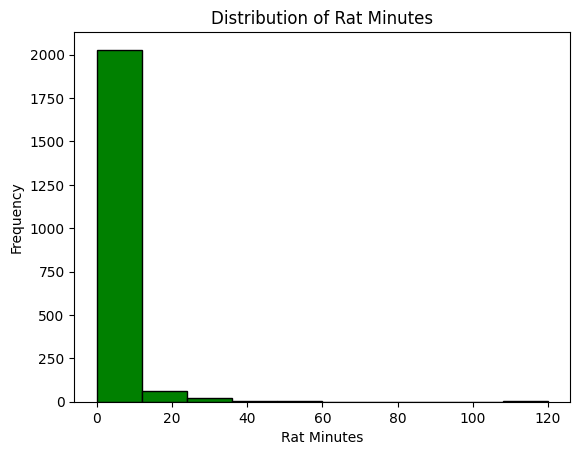

In [28]:
plt.hist(df2["rat_minutes"], bins=10, color='green', edgecolor='black')
plt.xlabel("Rat Minutes")
plt.ylabel("Frequency")
plt.title("Distribution of Rat Minutes")
plt.show()


In [29]:
sample = df2['rat_minutes'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %.2f" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %.2f" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 1.9944418275581723
Median: 0.00
Mode value: 0.00
Range: 120.00
Sample variance: 46.15. Population variance: 46.13.
Sample std. dev.: 6.79. Population std. dev.: 6.79.
IQR: 0.16. 25th percentile: 0.00. 75th percentile: 0.16


In [30]:
df2['rat_arrival_number'].value_counts()

rat_arrival_number
0     1578
1      335
2      118
3       45
4       27
5        8
6        6
7        3
8        2
17       1
Name: count, dtype: int64

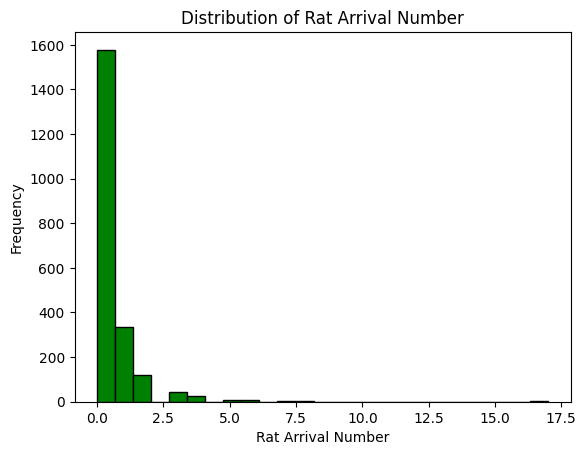

In [31]:
plt.hist(df2["rat_arrival_number"], bins=25, color='green', edgecolor='black')
plt.xlabel("Rat Arrival Number")
plt.ylabel("Frequency")
plt.title("Distribution of Rat Arrival Number")
plt.show()

In [32]:
sample = df2['rat_arrival_number'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %d" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %d" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 0
Median: 0.00
Mode value: 0
Range: 17
Sample variance: 1.04. Population variance: 1.04.
Sample std. dev.: 1.02. Population std. dev.: 1.02.
IQR: 1.00. 25th percentile: 0.00. 75th percentile: 1.00


In [33]:

with_rats = df2[df2['rat_arrival_number'] > 0]
without_rats = df2[df2['rat_arrival_number'] == 0]

print(f"Observation periods with rats: {len(with_rats)}")
print(f"Observation periods without rats: {len(without_rats)}")

# Compare bat landing numbers
print(f"\nBat activity comparison:")
print(f"Average bat landings with rats present: {stats.mean(with_rats['bat_landing_number']):.2f}")
print(f"Average bat landings without rats: {stats.mean(without_rats['bat_landing_number']):.2f}")

print(f"\nMedian bat landings with rats present: {np.median(with_rats['bat_landing_number']):.2f}")
print(f"Median bat landings without rats: {np.median(without_rats['bat_landing_number']):.2f}")

# Standard deviation
print(f"\nStandard deviation with rats: {np.std(with_rats['bat_landing_number'], ddof=1):.2f}")
print(f"Standard deviation without rats: {np.std(without_rats['bat_landing_number'], ddof=1):.2f}")

Observation periods with rats: 545
Observation periods without rats: 1578

Bat activity comparison:
Average bat landings with rats present: 27.67
Average bat landings without rats: 33.61

Median bat landings with rats present: 21.00
Median bat landings without rats: 29.00

Standard deviation with rats: 22.39
Standard deviation without rats: 26.47


In [34]:

print("\n=== Rat Intensity vs Bat Activity ===")

# Categorize rat presence intensity
df2['rat_intensity'] = pd.cut(df2['rat_arrival_number'], 
                                      bins=[-1, 0, 1, 2, float('inf')], 
                                      labels=['No rats', 'Low (1)', 'Medium (2)', 'High (3+)'])

rat_intensity_analysis = df2.groupby('rat_intensity').agg({
    'bat_landing_number': ['count', 'mean', 'median'],
    'food_availability': 'mean',
    'rat_minutes': 'mean'
}).round(2)

print("Bat activity by rat presence intensity:")
rat_intensity_analysis


=== Rat Intensity vs Bat Activity ===
Bat activity by rat presence intensity:


bat_landing_number               food_availability rat_minutes
                           count   mean median              mean        mean
rat_intensity                                                               
No rats                     1578  33.61   29.0              2.50        0.00
Low (1)                      335  28.66   22.0              2.24        4.88
Medium (2)                   118  26.56   22.0              2.42        7.49
High (3+)                     92  25.49   16.0              2.34       18.65

In [35]:
approach_times = df1['bat_landing_to_food']
min_time = approach_times.min()
q25 = np.percentile(approach_times, 25)
q75 = np.percentile(approach_times, 75)
max_time = approach_times.max()

print(f"Approach time ranges:")
print(f"Minimum: {min_time:.2f} seconds")
print(f"25rd percentile: {q25:.2f} seconds")
print(f"75th percentile: {q75:.2f} seconds")
print(f"Maximum: {max_time:.2f} seconds")


Approach time ranges:
Minimum: 0.01 seconds
25rd percentile: 1.00 seconds
75th percentile: 12.00 seconds
Maximum: 443.00 seconds


In [36]:

time_bins = [0.01, q25, q75, max_time + 1]
vigilance_labels = ['Low_Vigilance', 'Medium_Vigilance', 'High_Vigilance']

df1['vigilance_level'] = pd.cut(df1['bat_landing_to_food'], 
                                             bins=time_bins, 
                                             labels=vigilance_labels)



In [37]:
df1['vigilance_level'].value_counts()

vigilance_level
Medium_Vigilance    415
Low_Vigilance       238
High_Vigilance      213
Name: count, dtype: int64

##  Key columns For Investigation A

For investigating whether bats perceive rats as predators, we focus on features from both dataset:
- **Risk Column**
- **bat_landing_to_food** 
- **Rewards** 
- **Habit**
- **Bat landing Number** 
- **Rat arrival number**
- **Rat Minutes**
- *Food avialability* 

****

**Inferential Data Analysis**

In [38]:
df1['risk'].value_counts()/(len(df1)) *100

risk
1    51.847575
0    48.152425
Name: count, dtype: float64

In [39]:
# vigilance confidence interval 95%
sample_vigilance = df1['bat_landing_to_food']
vigilance_bar = sample_vigilance.mean()
vigilance_std = sample_vigilance.std()
vigilance_size=len(sample_vigilance)
# z-score (assuming 95% Confidence Level)
z_score = st.norm.ppf(q = 0.975)
print("Z-statistic: %.2f" % z_score)

# compute standard error
std_err = vigilance_std / math.sqrt(vigilance_size)
print(std_err)

ci_low_stm, ci_upp_stm = stw._zconfint_generic(vigilance_bar,std_err,alpha=0.05, alternative="two-sided")
print("Confidence Interval of the mean: %.2f to %.2f" % (ci_low_stm, ci_upp_stm))

Z-statistic: 1.96
0.9438299714489559
Confidence Interval of the mean: 10.01 to 13.71


In [40]:
bats_risk_taking = df1[df1['risk']==1]
bats_risk_avoiding = df1[df1['risk']==0]

In [41]:
# risk taking proportion, risk=1
prop = len(bats_risk_taking)

# sample size
total =len(df1['risk'])

# confidence level
conf_lvl = 0.95

# significance level (alpha)
sig_lvl = 1 - conf_lvl
# compute confidence interval for proportion (confidence level=95%)
ci_low, ci_upp = stp.proportion_confint(prop, total, alpha=sig_lvl, method="normal")
print("C.I. of proportion at %d%% confidence level is %.3f (%.1f%%) and %.3f (%.1f%%)." % 
      (conf_lvl*100, ci_low, ci_low*100, ci_upp, ci_upp*100))

C.I. of proportion at 95% confidence level is 0.485 (48.5%) and 0.552 (55.2%).


In [42]:
sample = df1["bat_landing_to_food"]
x_bar = st.tmean(sample)
s = st.tstd(sample)
print("\t Sample mean: %.2f" % x_bar)
print("\t Sample std. dev.: %.2f" % s)

	 Sample mean: 11.86
	 Sample std. dev.: 27.77


In [43]:
# perform one-sample t-test
# null hypothesis: population mean = 10
# alternative hypothesis: population mean > 10 (in the function below, note the argument 'greater')
t_stat, p_val = st.ttest_1samp(sample, 10, alternative="greater")
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stat)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


 Computing t* ...
	 t-statistic (t*): 1.97

 Computing p-value ...
	 p-value: 0.0245

 Conclusion:
	 We reject the null hypothesis.


In [44]:
sample1 = bats_risk_taking['bat_landing_to_food'].to_numpy()
sample2 = bats_risk_avoiding['bat_landing_to_food'].to_numpy()

x_bar1 = st.tmean(sample1)
s1 = st.tstd(sample1)
n1 = len(sample1)
print("\t Statistics of sample 1: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar1, s1, n1))


# the basic statistics of sample 2:
x_bar2 = st.tmean(sample2)
s2 = st.tstd(sample2)
n2 = len(sample2)
print("\t Statistics of sample 2: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar2, s2, n2))



# perform two-sample t-test
# null hypothesis: mean of sample 1 = mean of sample 2
# alternative hypothesis: mean of sample 1 is greater than mean of sample 2 (one-sided test)
# note the argument equal_var=False, which assumes that two populations do not have equal variance
t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative='greater')
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stats)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


	 Statistics of sample 1: 16.394 (mean), 32.746 (std. dev.), and 449 (n).
	 Statistics of sample 2: 6.979 (mean), 20.081 (std. dev.), and 417 (n).

 Computing t* ...
	 t-statistic (t*): 5.14

 Computing p-value ...
	 p-value: 0.0000

 Conclusion:
	 We reject the null hypothesis.


In [45]:
bins = [0, 1, 3, 10, df2["rat_arrival_number"].max()]
labels = ["no_rat", "low", "medium", "high"]
df2["rat_density"] = pd.cut(df2["rat_arrival_number"], bins=bins, labels=labels, include_lowest=True)


In [46]:

mean = df2["bat_landing_number"].mean()
s = df2["bat_landing_number"].std(ddof=1)
n = len(df2["bat_landing_number"])
se = s / math.sqrt(n)


z_score = st.norm.ppf(q = 0.975)
print("Z-statistic: %.2f" % z_score)


ci_low_stm, ci_upp_stm = stw._zconfint_generic(mean,se,z_score, alternative="two-sided")
print("Confidence Interval of the mean: %.2f to %.2f" % (ci_low_stm, ci_upp_stm))

Z-statistic: 1.96
Confidence Interval of the mean: 33.22 to 30.94


In [47]:
sample = df2["bat_landing_number"]
x_bar = st.tmean(sample)
s = st.tstd(sample)
print("\t Sample mean: %.2f" % x_bar)
print("\t Sample std. dev.: %.2f" % s)


	 Sample mean: 32.08
	 Sample std. dev.: 25.61


In [48]:

# perform one-sample t-test
# null hypothesis: population mean = 50
# alternative hypothesis: population mean < 50 (in the function below, note the argument 'greater')
t_stat, p_val = st.ttest_1samp(sample, 50, alternative="less")
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stat)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


 Computing t* ...
	 t-statistic (t*): -32.23

 Computing p-value ...
	 p-value: 0.0000

 Conclusion:
	 We reject the null hypothesis.


In [49]:
sample1 = df2['bat_landing_number'].to_numpy()
sample2 = df2['rat_arrival_number'].to_numpy()

x_bar1 = st.tmean(sample1)
s1 = st.tstd(sample1)
n1 = len(sample1)
print("\t Statistics of sample 1: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar1, s1, n1))


# the basic statistics of sample 2:
x_bar2 = st.tmean(sample2)
s2 = st.tstd(sample2)
n2 = len(sample2)
print("\t Statistics of sample 2: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar2, s2, n2))


	 Statistics of sample 1: 32.083 (mean), 25.614 (std. dev.), and 2123 (n).
	 Statistics of sample 2: 0.445 (mean), 1.019 (std. dev.), and 2123 (n).


In [50]:
# perform two-sample t-test
# null hypothesis: mean of sample 1 = mean of sample 2
# alternative hypothesis: mean of sample 1 is greater than mean of sample 2 (one-sided test)
# note the argument equal_var=False, which assumes that two populations do not have equal variance
t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative='greater')
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stats)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")



 Computing t* ...
	 t-statistic (t*): 56.87

 Computing p-value ...
	 p-value: 0.0000

 Conclusion:
	 We reject the null hypothesis.


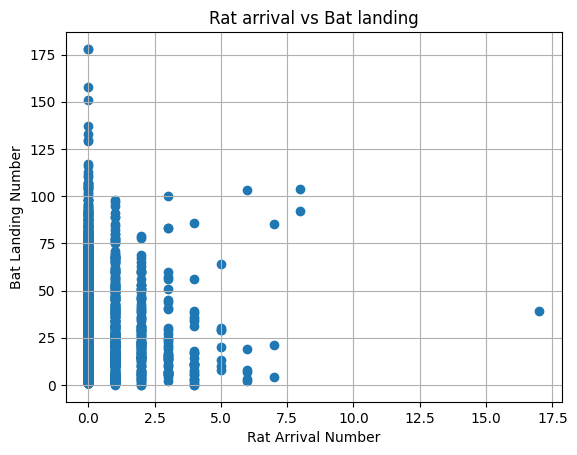

Model with intercept:
Intercept:  32.90514435372475
Coefficient:  [-1.84811596]


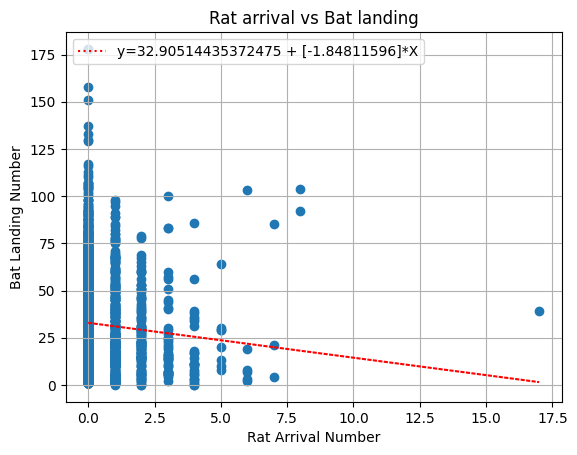

In [51]:
# Bats landing correlate to rats arrival 
X = df2['rat_arrival_number'].values
y = df2['bat_landing_number'].values


# Plot data points as a scatterplot 
plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.grid()
plt.show()


# Model 1 #
# Initialise a linear regression model
model = LinearRegression()

# Fit the linear regression model on the data
model.fit(X.reshape(-1,1), y)

# Get the intercept and coefficient values
intercept = model.intercept_
coeff_intercept = model.coef_ 
print("Model with intercept:")
print("Intercept: ", intercept)
print("Coefficient: ", coeff_intercept)

# Visualise the regression line over all data points
x_line1 = X
y_line1 = x_line1 * coeff_intercept + intercept

plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.plot(x_line1, y_line1, ":r", label=f"y={intercept} + {coeff_intercept}*X")
plt.legend(loc='upper left')
plt.grid()
plt.show()


**The Regression Plot showing decreasing bat landing while Rat arrival Number are increasing**

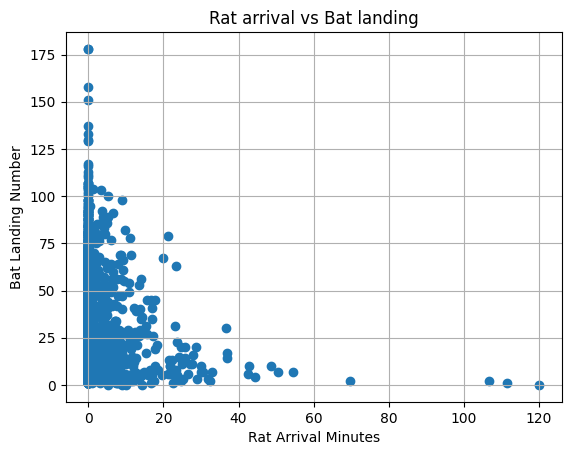

Model with intercept:
Intercept:  33.18300650358429
Coefficient:  [-0.55134921]


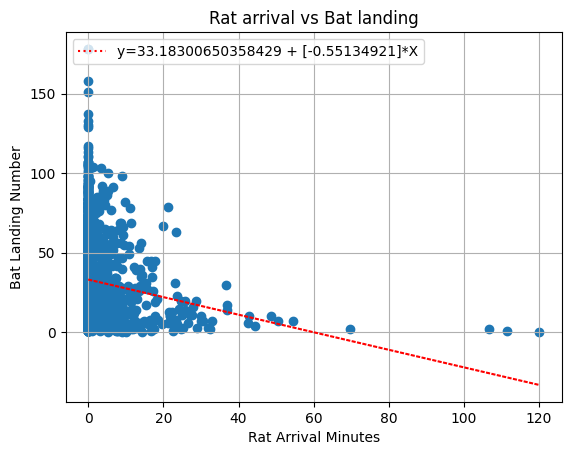

In [52]:
# Bats landing correlate to rats arrival 
X = df2['rat_minutes'].values
y = df2['bat_landing_number'].values


# Plot data points as a scatterplot 
plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Minutes")
plt.ylabel("Bat Landing Number")
plt.grid()
plt.show()


# Model 1 #
# Initialise a linear regression model
model = LinearRegression()

# Fit the linear regression model on the data
model.fit(X.reshape(-1,1), y)

# Get the intercept and coefficient values
intercept = model.intercept_
coeff_intercept = model.coef_ 
print("Model with intercept:")
print("Intercept: ", intercept)
print("Coefficient: ", coeff_intercept)

# Visualise the regression line over all data points
x_line1 = X
y_line1 = x_line1 * coeff_intercept + intercept

plt.scatter(X,y)
plt.title("Rat arrival vs Bat landing")
plt.xlabel("Rat Arrival Minutes")
plt.ylabel("Bat Landing Number")
plt.plot(x_line1, y_line1, ":r", label=f"y={intercept} + {coeff_intercept}*X")
plt.legend(loc='upper left')
plt.grid()
plt.show()


**If Rats were present in the food platform Bats were less landing**

**Bats Perceive Rats not just as competitors for food but also as potential predator.**